## Implementación de los algoritmos vistos en Clase


### Dado 3 puntos en el plano y tomando el primer punto como el origen P0 determinar si el punto P2 esta girado a la derecha o izquierda respecto a P1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

el punto p2 se encuentra a la derecha de p1


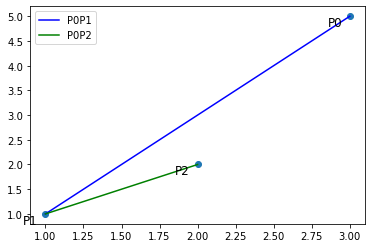

In [3]:
def cross_product(p0,p1,p2):
    x1 = p1[0] - p0[0]
    x2 = p2[0] - p0[0]
    y1 = p1[1] - p0[1]
    y2 = p2[1] - p0[1]
    return x1 * y2 - x2 *y1

def orientation (p0,p1,p2):
    cross = cross_product(p0,p1,p2)
    if cross > 0 :
        print("el punto p2 se encuentra a la derecha de p1")
    elif cross < 0 :
        print("el punto p2 se encuentra a la izquierda de p1")
    else:
        print("los puntos son colineales entres si ")
     
    
    plt.plot([p0[0],p1[0]],[p0[1],p1[1]], "b",label = 'P0P1')
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g', label='P0P2')
    plt.scatter([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]])
    plt.annotate('P0', (p0[0], p0[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    plt.annotate('P1', (p1[0], p1[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    plt.annotate('P2', (p2[0], p2[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)

    plt.legend()
    plt.show()
    
    
    
p0 = (3,5)
p1 = (1,1)
p2 = (2,2)

orientation(p0,p1,p2)

## given two line segments you need to determinate if that segments intersect or not?

The line segments do not intersect


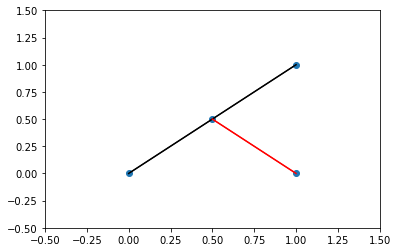

In [6]:
from matplotlib.patches import FancyArrowPatch
def cross_product(v1, v2):
    return v1[0] * v2[1] - v1[1] * v2[0]

def line_intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    
    v1 = p2 - p1
    v2 = p4 - p3
    denominator = cross_product(v2, v1)
    if denominator == 0:
        return None, None
    
    ua = cross_product(v2, p1 - p3) / denominator
    ub = cross_product(v1, p1 - p3) / denominator
    
    x = x1 + (ua * (x2 - x1))
    y = y1 + (ua * (y2 - y1))
    
    if ua >= 0 and ua <= 1 and ub >= 0 and ub <= 1:
        return np.array([x, y])
    else:
        return None

def plot_segment(p1, p2, color='black', arrow=False):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color)
    if arrow:
        arrow = FancyArrowPatch(p1, p2, color=color, arrowstyle='->')
        plt.gca().add_patch(arrow)
        
p1 = np.array([0, 0])
p2 = np.array([1, 1])
p3 = np.array([0.5, 0.5])
p4 = np.array([1, 0])

intersection = line_intersection(p1, p2, p3, p4)

if intersection is None:
    print("The line segments do not intersect")
else:
    print("The line segments intersect at: ", intersection)

plot_segment(p1, p2, arrow=True)
plot_segment(p3, p4, color='red', arrow=True)

plt.scatter([p1[0], p2[0], p3[0], p4[0]], [p1[1], p2[1], p3[1], p4[1]])
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## Make a function that the input be a list of points and calculate the convex hull 

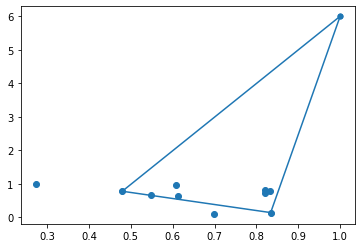

In [19]:


def cross_product(v1, v2):
    return v1[0] * v2[1] - v1[1] * v2[0]

def sort_points(points):
    n = points.shape[0]
    pivot = np.argmin(points, axis=0)
    points = np.delete(points, pivot, axis=0)
    points = points[np.argsort(np.arctan2(points[:, 1] - pivot[1], points[:, 0] - pivot[0]))]
    l = [pivot]
    for p in points:
        while len(l) >= 2 and cross_product(l[-1] - l[-2], p - l[-2]) <= 0:
            l.pop()
        l.append(p)
    return np.array(l)

def convex_hull(points):
    n = points.shape[0]
    hull = sort_points(points)
    hull = np.concatenate((hull, [hull[0]]))
    return hull

def plot_points_and_hull(points, hull):
    plt.scatter(points[:,0], points[:,1])
    plt.plot(hull[:,0], hull[:,1], '-o', markersize=5)
    plt.show()

points = np.random.rand(10, 2)
points = points/np.max(points)

hull = convex_hull(points)
plot_points_and_hull(points, hull)

In [14]:
points = np.random.rand(100, 2)
points = points/np.max(points)
points

array([[0.35009095, 0.28109947],
       [0.07053509, 0.37268884],
       [0.83985501, 0.08180652],
       [0.36027835, 0.49932316],
       [0.25888434, 0.69145756],
       [1.        , 0.74543299],
       [0.27256138, 0.7940451 ],
       [0.57420364, 0.2027256 ],
       [0.29827847, 0.26782861],
       [0.51958381, 0.71754641],
       [0.49413672, 0.33881416],
       [0.76131096, 0.15833564],
       [0.2047636 , 0.46017893],
       [0.23079302, 0.0415731 ],
       [0.87664946, 0.30533649],
       [0.27338297, 0.32020602],
       [0.51520745, 0.05510243],
       [0.33839196, 0.80097681],
       [0.90849087, 0.01492664],
       [0.97172306, 0.64554288],
       [0.69310967, 0.43000698],
       [0.51508051, 0.71765095],
       [0.00302005, 0.48030084],
       [0.88039589, 0.25311858],
       [0.71733376, 0.11472188],
       [0.4847215 , 0.81324394],
       [0.32402196, 0.89425274],
       [0.60433988, 0.14626121],
       [0.16459861, 0.3108675 ],
       [0.58961753, 0.06903755],
       [0.